In [250]:
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [252]:
new_data = data.iloc[:,[0,2]] # age ve bmi
new_data.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [253]:
from sklearn import preprocessing

new_data2 = preprocessing.normalize(new_data)
new_data3 = pd.DataFrame(new_data2)
new_data3.head()

,0,1
0,0.562877,0.826541
1,0.470371,0.882469
2,0.646977,0.762509
3,0.823838,0.566825
4,0.742371,0.669989


In [254]:
age = new_data3[0]
bmi = new_data3[1]
dictionary = {"age":age,"bmi":bmi}
data = pd.DataFrame(dictionary)

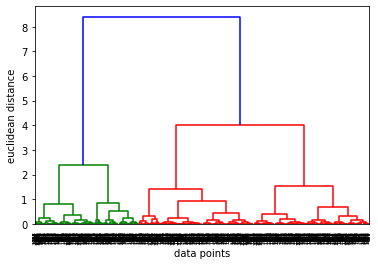

In [255]:
# dendogram

from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward") #varyansları yayılımları azaltır

dendrogram(merg,leaf_rotation = 90)#90 derece dik yapıyo
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()
#yatay çizgi tarafından kesilmeyen en büyük distance'ın olduğu yerden çizgi çekicez ona göre cluster sayısına karar vercez

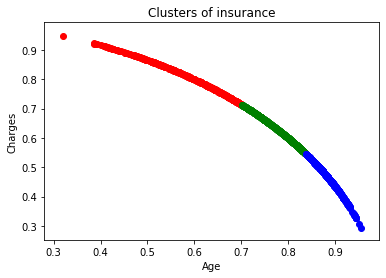

In [256]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")

#manhattan,cosine,precomputed
#If linkage is “ward”, only “euclidean” is accepted.
#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
#linkage{“ward”, “complete”, “average”, “single”}, default=”ward”

cluster = hiyerartical_cluster.fit_predict(data)#modeli oluştur sonra datama göre prediction yap clusterlarımı oluştur

data["label"] = cluster

plt.scatter(data.age[data.label == 0 ],data.bmi[data.label == 0],color = "red")
plt.scatter(data.age[data.label == 1 ],data.bmi[data.label == 1],color = "green")
plt.scatter(data.age[data.label == 2 ],data.bmi[data.label == 2],color = "blue")
#plt.scatter(data.age[data.label == 3 ],data.bmi[data.label == 3],color = "pink")
#plt.scatter(data.age[data.label == 4 ],data.bmi[data.label == 4],color = "orange")
#plt.scatter(data.age[data.label == 5 ],data.bmi[data.label == 5],color = "purple")

plt.title('Clusters of insurance')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()